In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


incidents = pd.read_csv("C:\VS Code\LA_Fires\mapdataall.csv")

#southern cali counties
socal_counties = np.array([
    "Los Angeles","San Diego","Orange",
    "Riverside","San Bernardino","Ventura",
    "Santa Barbara","San Luis Obispo","Imperial",
    "Kern","Mono"
])

#standardize and replace counties
std_counties = incidents['incident_county'].str.strip().str.lower()
incidents['std_incident_county'] = std_counties
socal_counties = [county.strip().lower() for county in socal_counties]

#query incident df --> socal_incident df
#NIFC says a wildfire is atleast 100 acres

def is_socal(county):
    return county in socal_counties
def acres100(size):
    return size>=100
    
socal_incidents = incidents[incidents['std_incident_county'].apply(is_socal)]
socal_incidents = socal_incidents[socal_incidents['incident_acres_burned'].apply(acres100)]

socal_incidents = socal_incidents.drop(columns = ['incident_is_final', 'incident_date_last_update', 'incident_administrative_unit',
       'incident_administrative_unit_url',
       'incident_location', 'incident_containment',
       'incident_control', 'incident_cooperating_agencies', 'incident_type',
       'incident_url', 'incident_dateonly_extinguished', 'incident_dateonly_created',
       'is_active', 'calfire_incident', 'notification_desired',
       'std_incident_county'])

#organize by dates
def year_month(date):
    return date[:7].replace('-','_')

date_created = np.sort(socal_incidents['incident_date_created'].apply(year_month))

def correct_years(date):
    year = int(date[:4])
    if (year>=2014)and(year<2025):
        return True
    else:
        return False

socal_incidents = socal_incidents.drop(columns='incident_date_created')
socal_incidents['date_created'] = date_created
socal_incidents = socal_incidents[socal_incidents['date_created'].apply(correct_years)].set_index('incident_id')
socal_incidents

,e,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_date_extinguished,date_created
incident_id,,,,,,,
1fe0ea01-23e8-47a1-8fbd-ced6cf655e4d,Colby Fire,Los Angeles,1952.0,-117.881600,34.170300,2014-01-27T10:00:00Z,2014_01
a67fe9bc-b8ec-4ed1-a2e8-06623aab7039,Gun Fire,San Diego,125.0,-116.490000,32.810000,2014-03-11T11:00:00Z,2014_03
13bfff2c-cb2f-4ed9-a7f8-6985646a2d5d,Etiwanda Fire,San Bernardino,2143.0,-117.547374,34.169346,2014-05-05T17:30:00Z,2014_04
9e5ee790-ee7e-4b40-b300-7a3046901162,Bernardo Fire,San Diego,1548.0,-117.133000,33.003000,2014-05-17T20:14:00Z,2014_05
d08b0c4e-35d3-43fb-8af8-1756b1789172,Miguelito Fire,Santa Barbara,632.0,-120.454000,34.609000,2014-05-19T09:20:00Z,2014_05
...,...,...,...,...,...,...,...
c687c452-39bc-4e47-bcc1-aa809fc2ef79,Jack Fire,Riverside,260.0,-117.037542,33.923955,2024-10-15T11:39:00Z,2024_10
cb4f3767-abd3-4c41-a36c-97e10a79a2b0,Dove Fire,Kern,1000.0,-118.103300,35.455540,NaN,2024_10
f78e6fd0-c260-486c-98b4-620938406a45,Mountain Fire,Ventura,19904.0,-118.968900,34.318900,NaN,2024_11


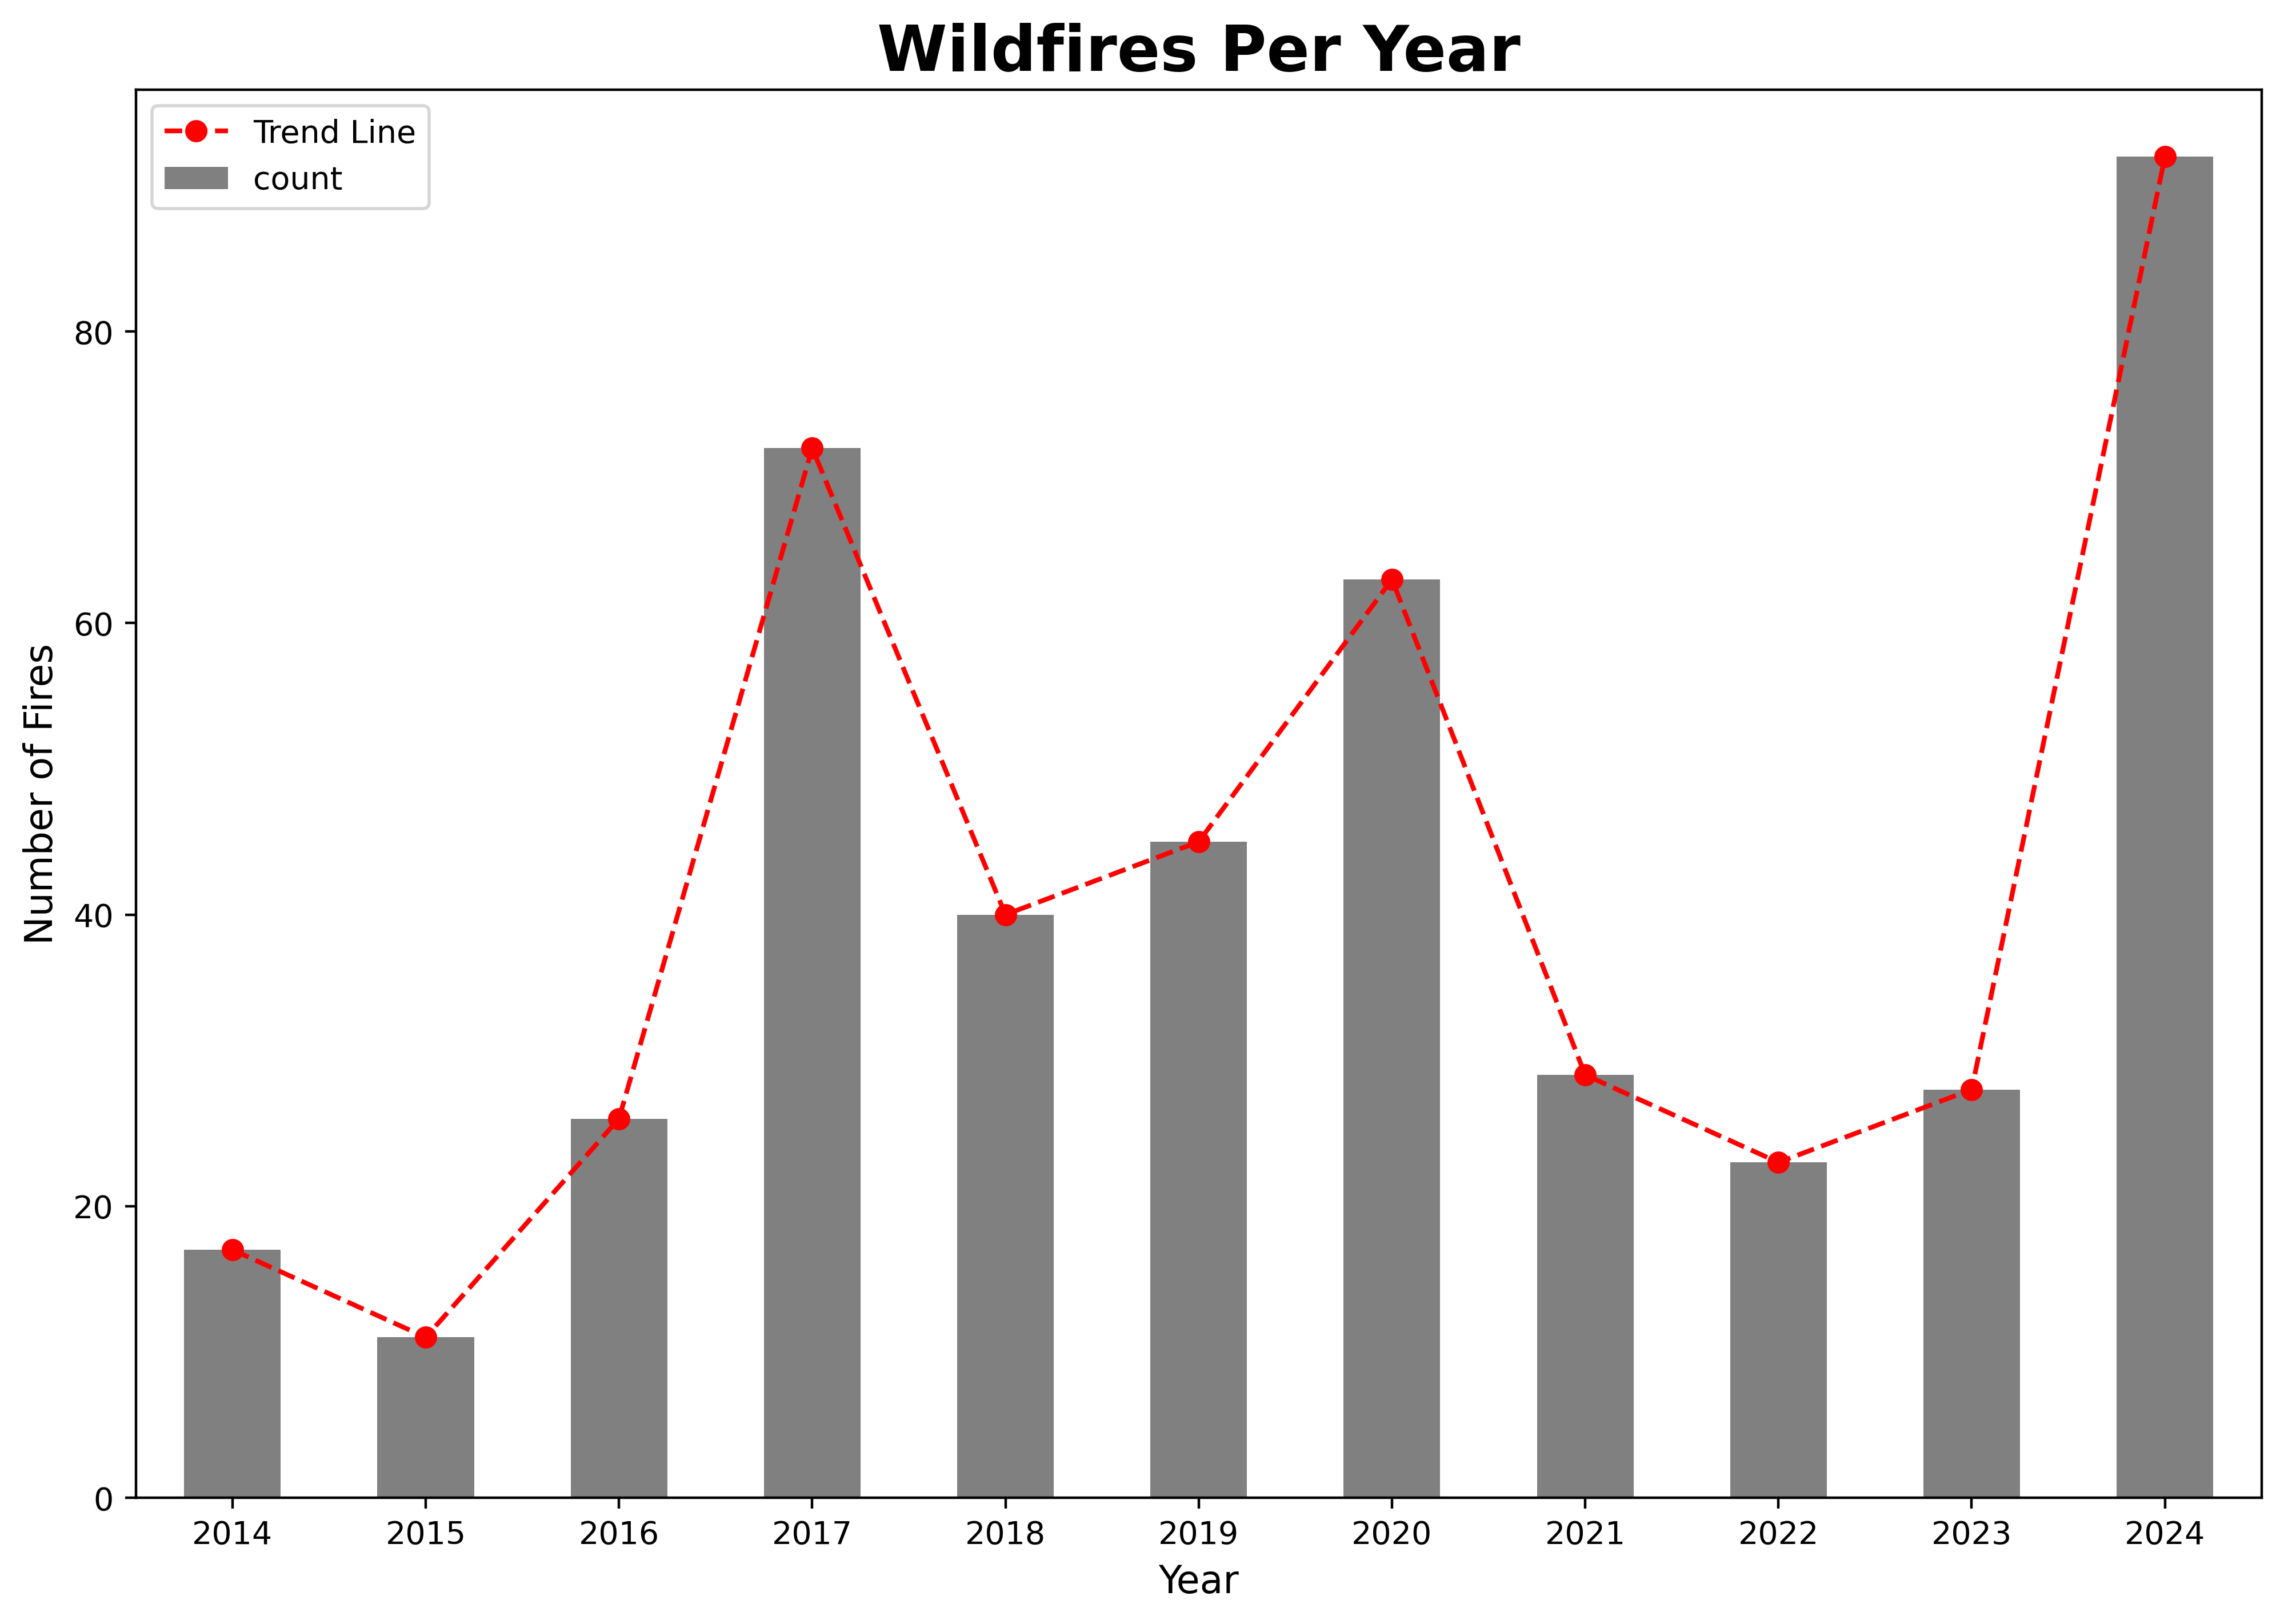

In [10]:

#plotting
socal_incidents['Year'] = socal_incidents['date_created'].str[:4]
filtered_years = socal_incidents['Year'].value_counts().sort_index()


plt.figure(figsize=(12, 8), dpi=400)
ax = filtered_years.plot(kind='bar', color='grey', title='Wildfires Per Year')
plt.xticks(rotation=0)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Fires', fontsize=12)
plt.title('Wildfires Per Year', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(filtered_years.index, filtered_years.values, color='red', marker='o', linestyle='--', label='Trend Line')

plt.legend()
plt.show()

In [4]:
# Filter for incidents in Los Angeles County only (case insensitive)
la_incidents = incidents[incidents['std_incident_county'] == 'los angeles']

# Drop irrelevant columns (same as in socal_incidents)
la_incidents = la_incidents.drop(columns=[
    'incident_is_final', 'incident_date_last_update', 'incident_administrative_unit',
    'incident_administrative_unit_url', 'incident_location', 'incident_containment',
    'incident_control', 'incident_cooperating_agencies', 'incident_type',
    'incident_url', 'incident_dateonly_extinguished', 'incident_dateonly_created',
    'is_active', 'calfire_incident', 'notification_desired', 'std_incident_county'
])

# Organize by dates
def year_month(date):
    return date[:7].replace('-', '_')

# Create a new column for formatted date
la_incidents['date_created'] = la_incidents['incident_date_created'].apply(year_month)

# Filter for years 2014–2024
def correct_years(date):
    year = int(date[:4])
    return (year >= 2014) and (year < 2025)

la_incidents = la_incidents[la_incidents['date_created'].apply(correct_years)]

# Set 'incident_id' as the index
la_fires = la_incidents.set_index('incident_id')

# Resetting index if needed (optional)
# la_incidents.reset_index(inplace=True)

la_fires['Year'] = la_fires['date_created'].str.split('_').str[0]  # Extract Year
la_fires['Month'] = la_fires['date_created'].str.split('_').str[1]
la_fires= la_fires.drop(columns=['e','incident_county','incident_longitude','incident_date_created','incident_latitude','incident_date_extinguished','date_created'])  # Extract Month

def dry_months(month):
    month = int(month)  # Convert to integer
    if month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    elif month == 12:
        return 'December'
    else:
        return None  # Return None for months outside July–December

# Apply function to filter and map months
la_fires['Month_Name'] = la_fires['Month'].apply(dry_months)

# Drop rows where 'Month_Name' is None (optional)
la_fires = la_fires.dropna(subset=['Month_Name']).drop(columns=['Month'])

la_fires.groupby(['Year','Month_Name']).sum().reset_index()

,Year,Month_Name,incident_acres_burned
0,2014,August,464.0
1,2015,July,200.0
2,2016,July,1100.0
3,2016,November,4824.0
4,2017,August,40.0
5,2017,December,22090.0
6,2017,July,135.0
7,2017,October,50.0
8,2017,September,7194.0
9,2018,July,128.0


In [5]:
pivoted_data = la_fires.groupby(['Year', 'Month_Name'])['incident_acres_burned'].sum().unstack()
pivoted_data = pivoted_data.fillna(0)
pivoted_data.columns.name = None  # Remove the 'Month_Name' label
pivoted_data = pivoted_data.reset_index()
pivoted_data.index.name = 'Year'
pivoted_data.set_index('Year')
pivoted_data.columns = ['Year', 'July', 'August', 'September', 'October', 'November', 'December']
pivoted_data

,Year,July,August,September,October,November,December
Year,,,,,,,
0,2014,464.0,0.0,0.0,0.0,0.0,0.0
1,2015,0.0,0.0,200.0,0.0,0.0,0.0
2,2016,0.0,0.0,1100.0,4824.0,0.0,0.0
3,2017,40.0,22090.0,135.0,0.0,50.0,7194.0
4,2018,0.0,0.0,128.0,0.0,0.0,3546.0
5,2019,1731.0,0.0,0.0,0.0,14201.0,0.0
6,2020,36324.0,0.0,2714.0,131.0,0.0,230.0
7,2021,50.0,0.0,1208.0,0.0,0.0,464.0
8,2022,5673.0,0.0,0.0,0.0,0.0,0.0


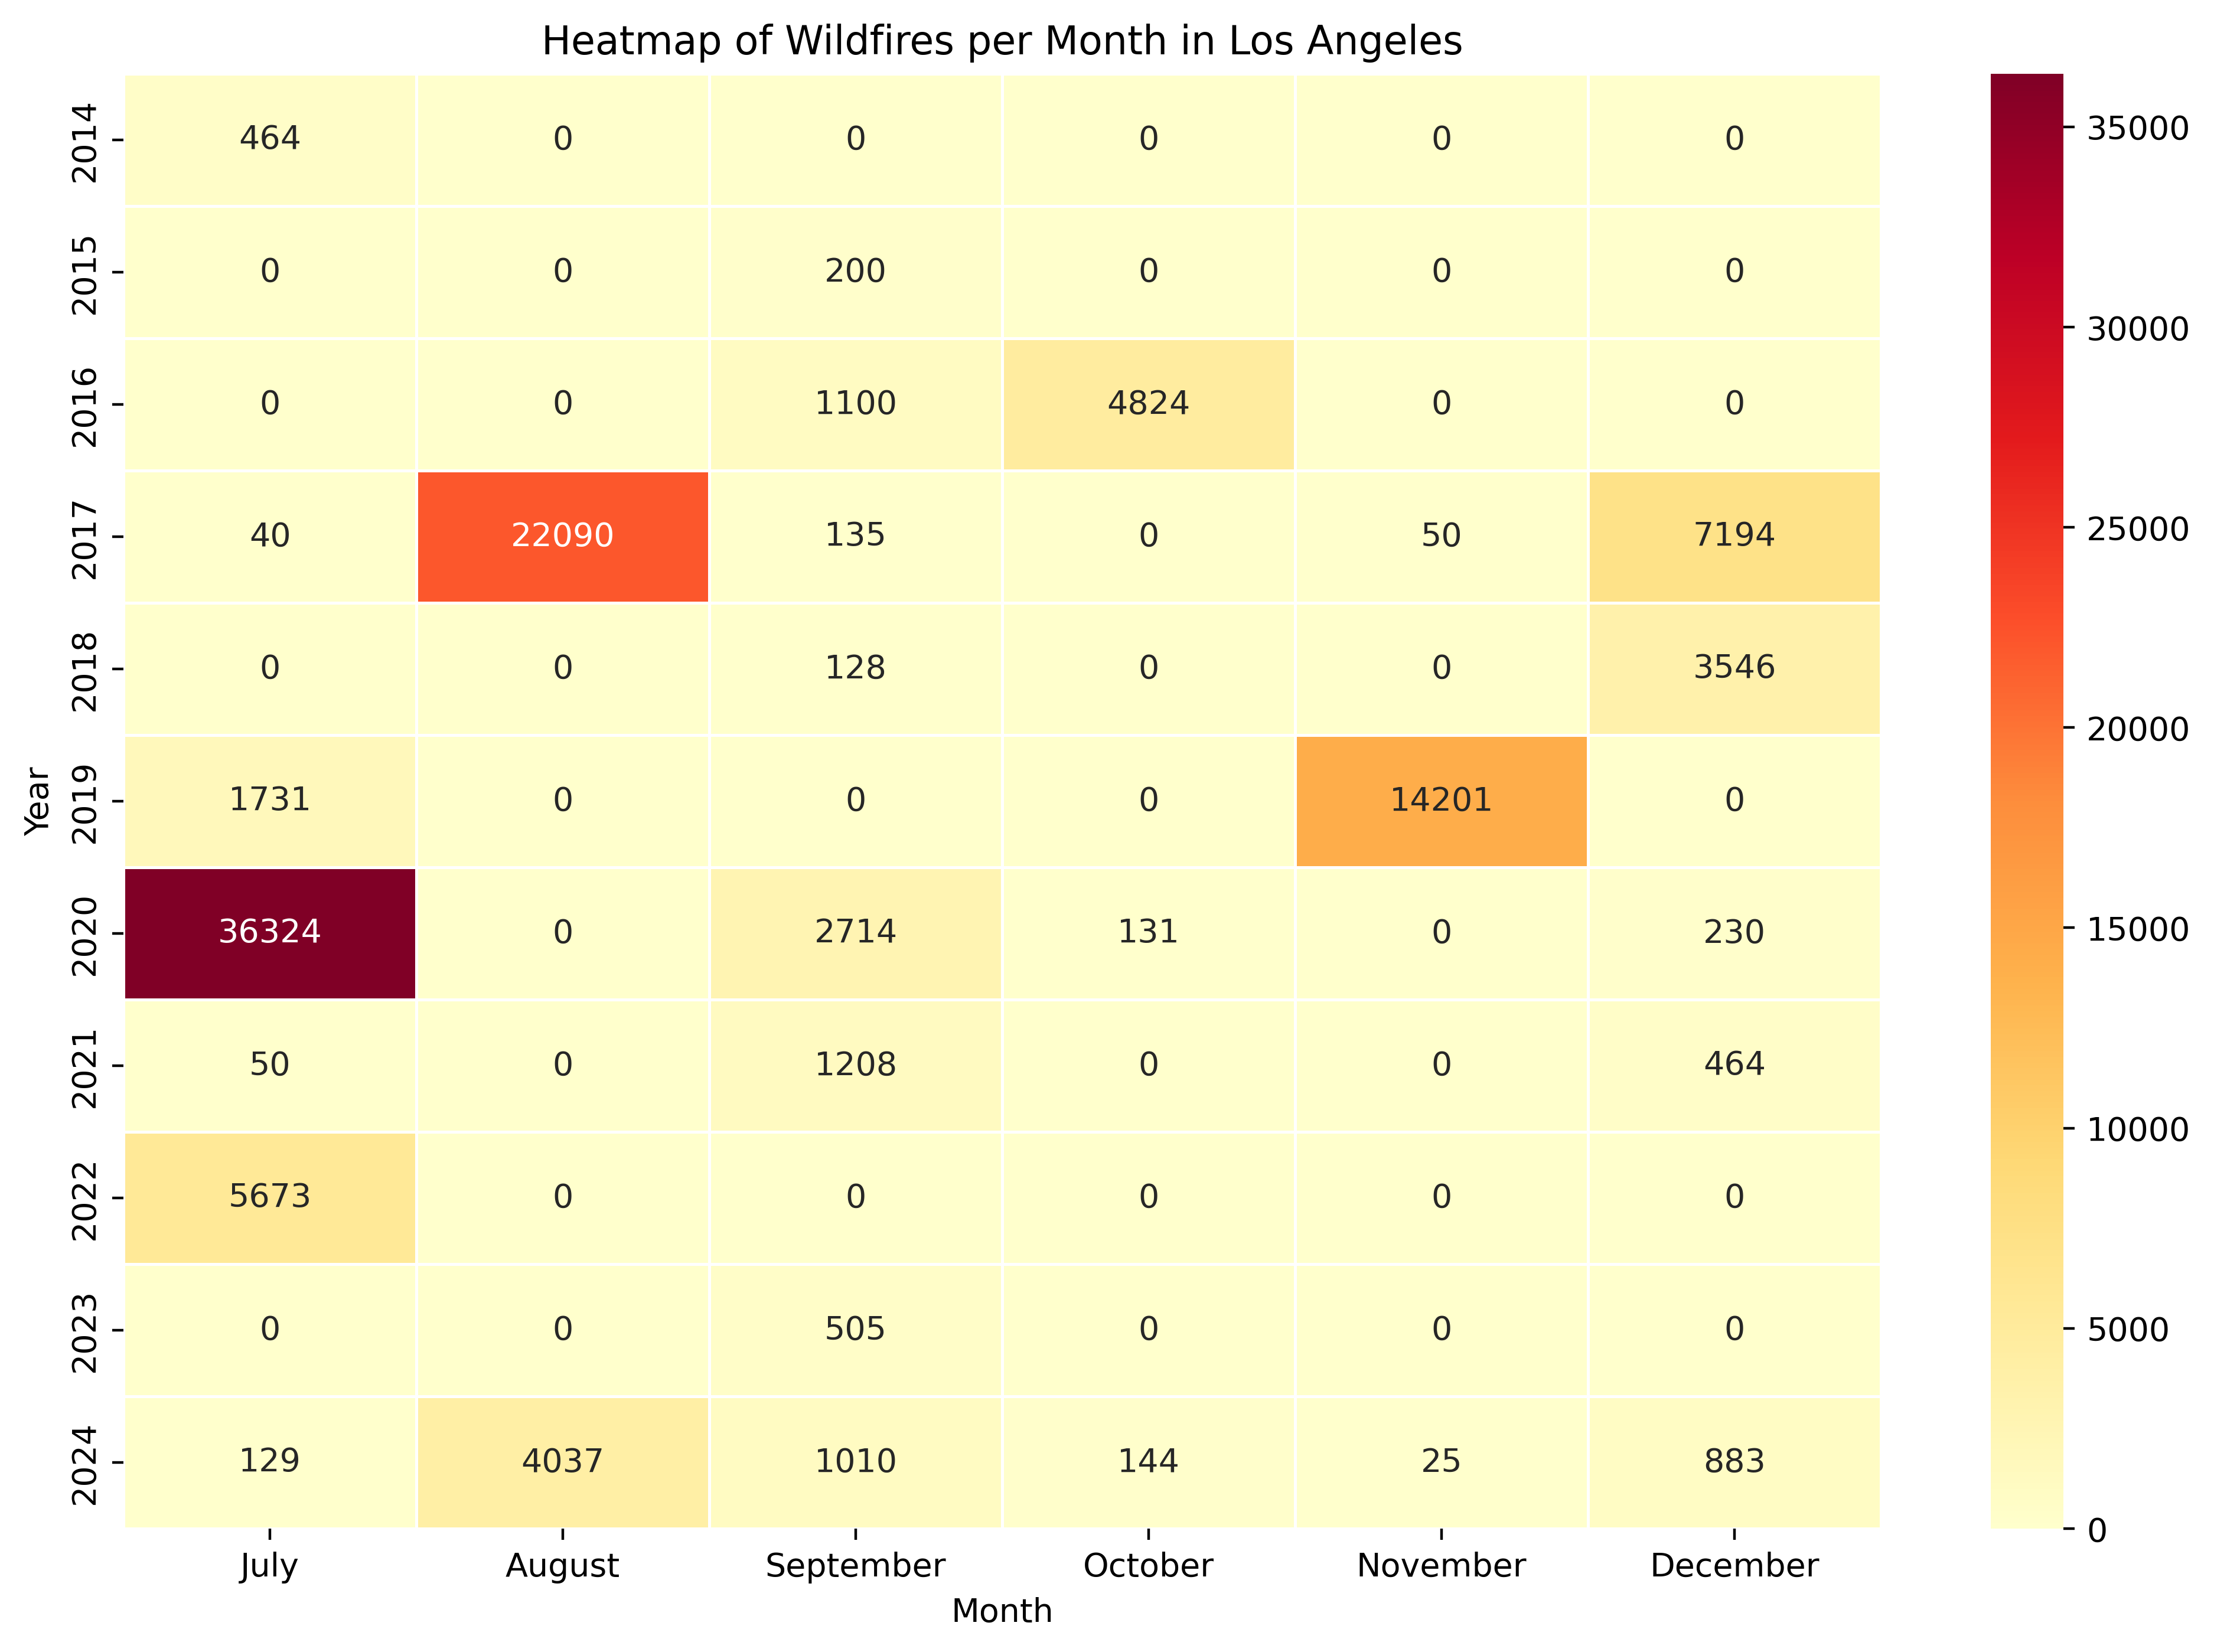

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 8), dpi=400)
sns.heatmap(pivoted_data.set_index('Year'), annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.9)

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Wildfires per Month in Los Angeles')
plt.show()


In [7]:
pivoted_data.to_csv('la_fires_incidents.csv',index=False)